### About the dataset


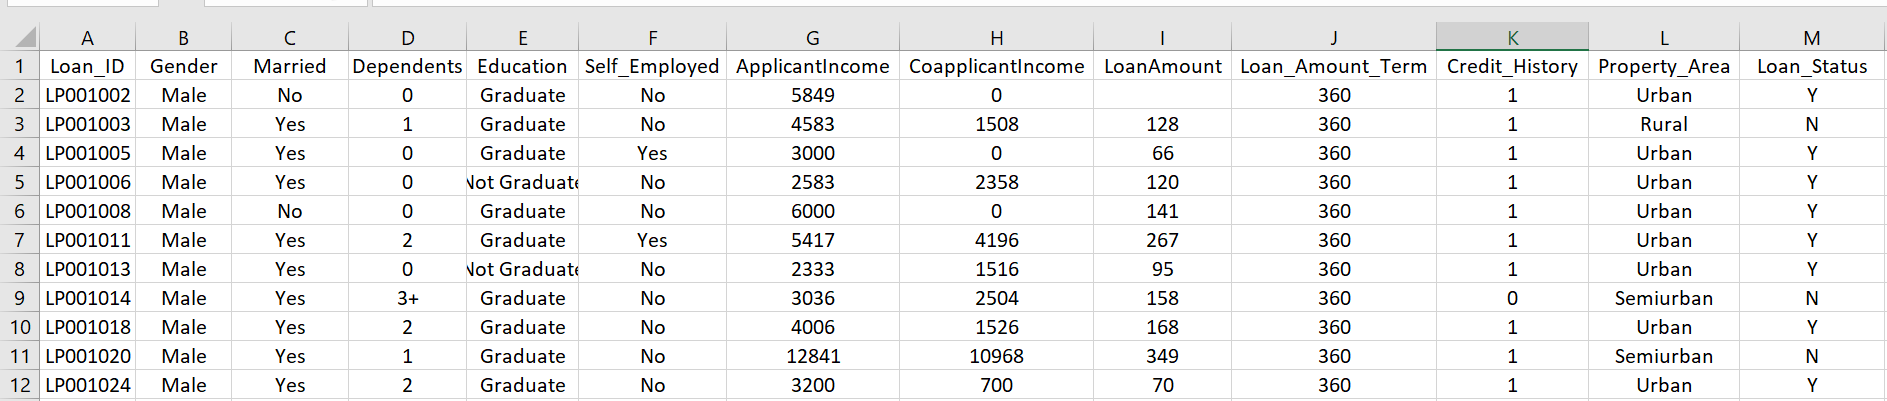


Context
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

To understand the data we are dealing with, here are some informations about the features
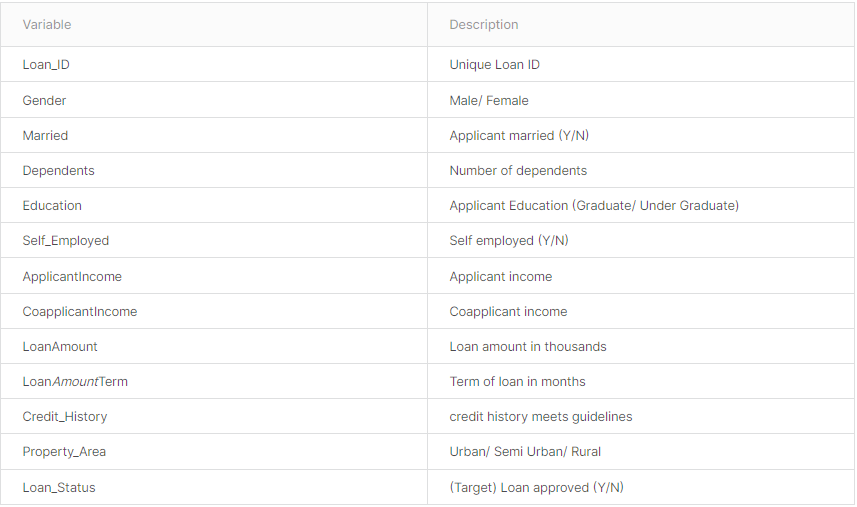

In [4]:
import os 

os.getcwd()
os.chdir('C:\\Users\\bilal\\Desktop\\ML')

In [8]:
import pandas as pd
df = pd.read_csv("LoanDataset/Loan_Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Data Understanding

In [12]:
# First we will begin with a quick understanding of our dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.info()

''' First of all it is important to see that we are not dealing with a large dataset (614 rows maximum). But we can clearly see 
see that there are missing values that we will need to deal with later.
We can also see that there are a lot of none numerical values that we will also need to deal with in order to perfome our
machine learning model.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


' First of all it is important to see that we are not dealing with a large dataset (614 rows maximum). But we can clearly see \nsee that there are missing values that we will need to deal with later.\nWe can also see that there are a lot of none numerical values that we will also need to deal with in order to perfome our\nmachine learning model.\n'

In [21]:
df.isna().sum()

'''
Here are the features that contains missing values : 
- Gender (13 rows)
- Married (3 rows)
- Dependents (15 rows)
- Self Employed (32 rows)
- LoanAmount (22 rows)      
- Loan_Amount_Term  (14 rows)   
- Credit_History (50 rows)      
'''

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# We will delete de null values
df = df.dropna()
df.shape


(480, 13)

In [41]:
# We will delete de LoanID feature because it is useless

df.drop("Loan_ID", axis =1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


'\nThere are much more Male than Female demands\n'

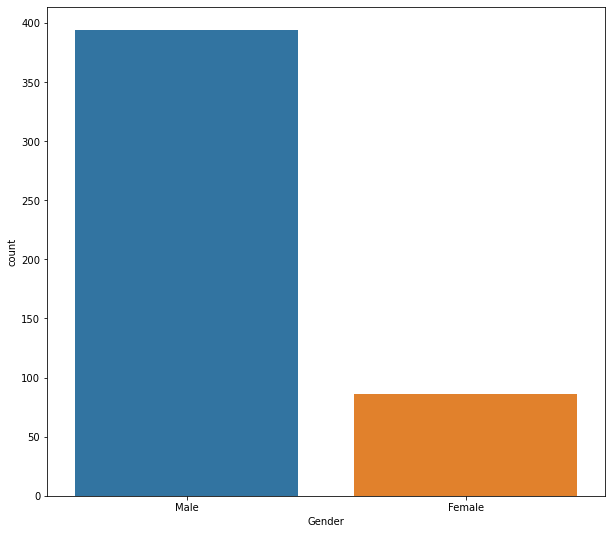

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,9))

df.Gender.value_counts()

sns.countplot(x=df.Gender)

'''
There are much more Male than Female demands
'''

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


'\nA lot of applicant does not have any dependents.\n'

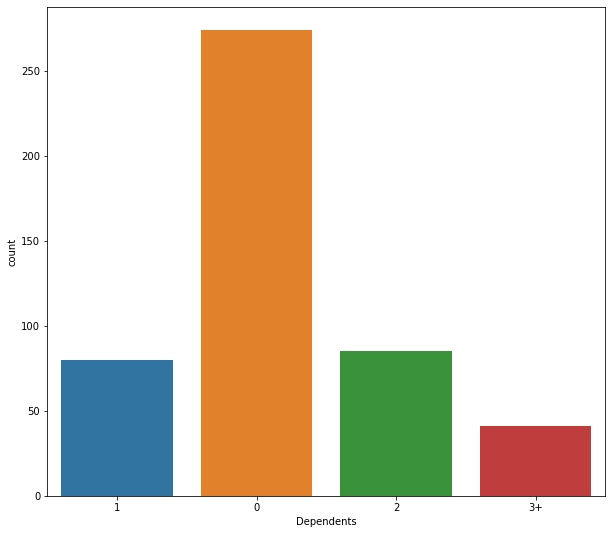

In [50]:
plt.figure(figsize=(10,9))
print(df.Dependents.value_counts())
sns.countplot(x=df.Dependents)

'''
A lot of applicant does not have any dependents.
'''

Graduate        383
Not Graduate     97
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

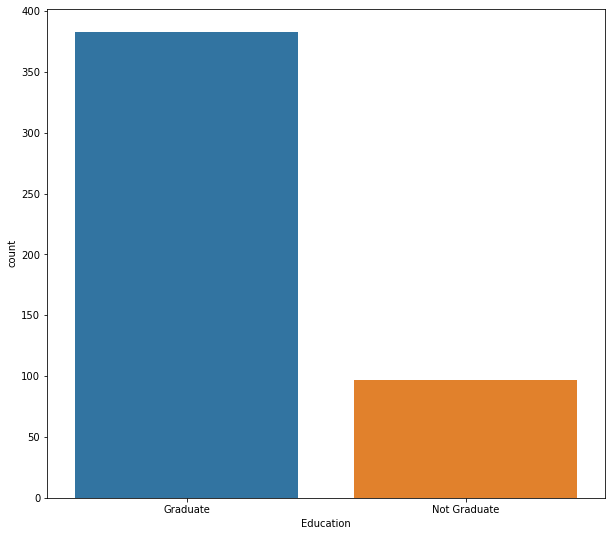

In [53]:
plt.figure(figsize=(10,9))
print(df.Education.value_counts())
sns.countplot(x=df.Education)

In [54]:
df.groupby(["Gender","Loan_Status"])["Gender"].count()

Gender  Loan_Status
Female  N               32
        Y               54
Male    N              116
        Y              278
Name: Gender, dtype: int64

In [56]:
df.groupby(["Education","Loan_Status"])["Education"].count()

Education     Loan_Status
Graduate      N              112
              Y              271
Not Graduate  N               36
              Y               61
Name: Education, dtype: int64

Skenwess :  2.361437


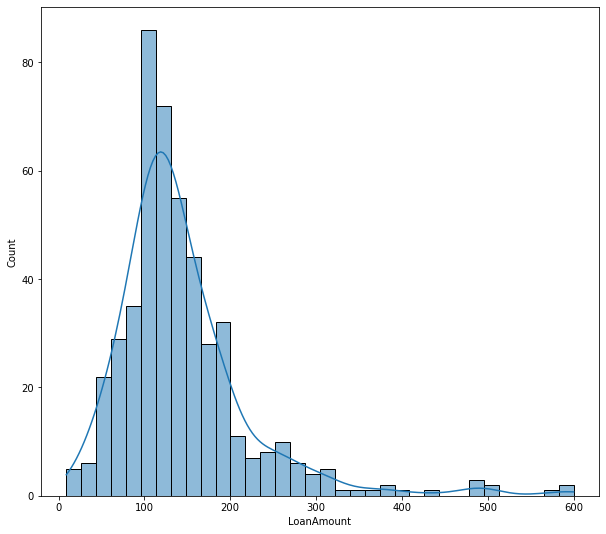

In [62]:
# let's focuse on the distribution of the LoanAmount feature
plt.figure(figsize=(10,9))

sns.histplot(df,x = "LoanAmount", kde = True)

# We can see that a lot of the applicatn require a Loan form 60-70 to 200 thousouand $.
# This feature follows a left skewed normal distribution.
print("Skenwess :  %f" % df.LoanAmount.skew())

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

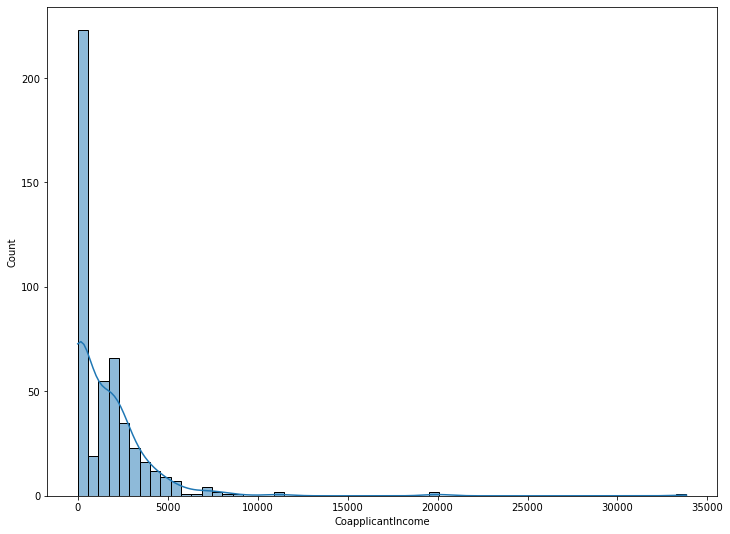

In [69]:
plt.figure(figsize=(12,9))
sns.histplot(data=df, x="CoapplicantIncome", kde=True)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

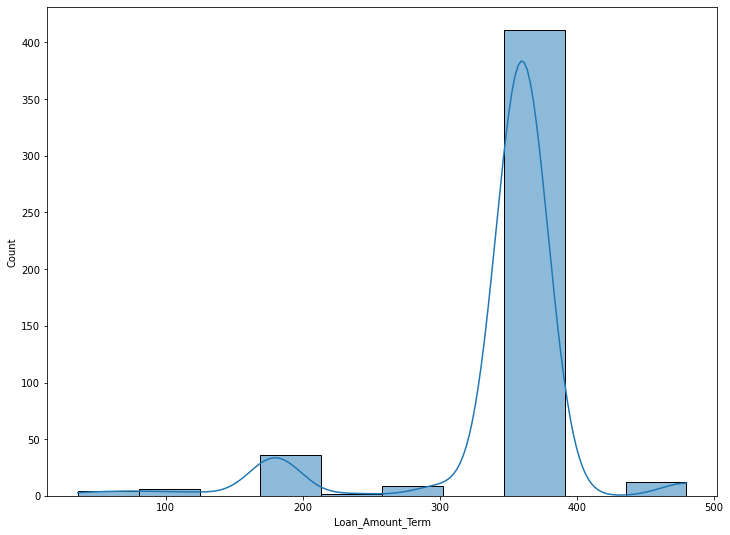

In [70]:
plt.figure(figsize=(12,9))
sns.histplot(data=df, x="Loan_Amount_Term", kde=True)


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

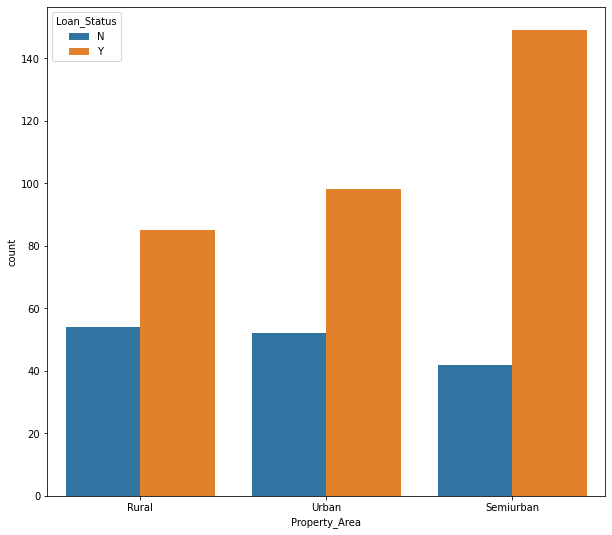

In [76]:
plt.figure(figsize=(10,9))

sns.countplot(x=df.Property_Area, hue= df.Loan_Status)
"""
The rural area has the most important rate of loan refusal.
"""

'\nThis boxplot show us a lot of good informations. We can clearly see that our dataset is affected by outliers which we can \nsee for the graduate  applicantIncome (More than 80000 thousand $ but still refused)\n'

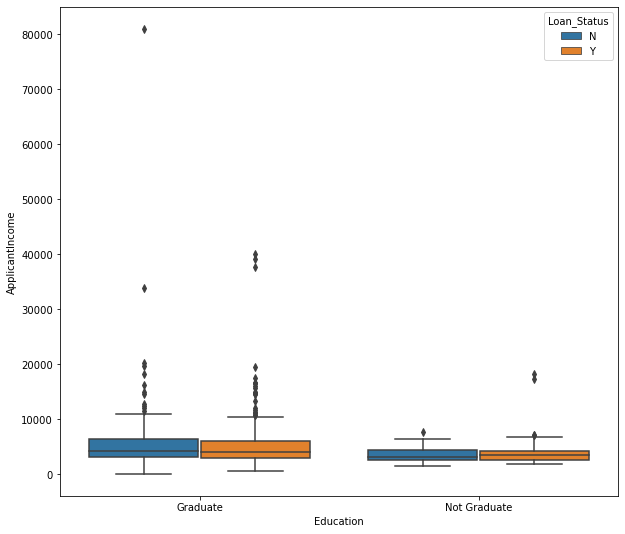

In [68]:
plt.figure(figsize=(10,9))

sns.boxplot(data=df, x="Education", y="ApplicantIncome", hue = 'Loan_Status')


'''
This boxplot show us a lot of good informations. We can clearly see that our dataset is affected by outliers which we can 
see for the graduate  applicantIncome (More than 80000 thousand $ but still refused). It seems that the higher the income is,
the higher the loan will be accepted.
'''

In [71]:
# lets see what could be the possibles reasons for the refusal of a Loan for the richest person in the dataset
# the dependents, loanamount, and property_area features could be the reasons why the loan was refused but
# we will have a clear view about the correlation between variables later.
df[df['ApplicantIncome'] > 80000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


###  Data preprocessing for ML algorithm

In [74]:
df.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [84]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from tqdm.auto import tqdm

categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)


label_encoder = LabelEncoder()

for column in tqdm(categorical_columns):
    df[column] = label_encoder.fit_transform(df[column])
    


"""
0 rural , 1 semi urban, 2 urban 
0 = Gratuated, 1 = No graduated
0 = Male, 1 = Female
0 = No (Loanstatus), 1 = Yes 
"""
df = df.drop('Loan_ID', axis = 1)
df

Index([], dtype='object')


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


### Bivariate analysis

<AxesSubplot:>

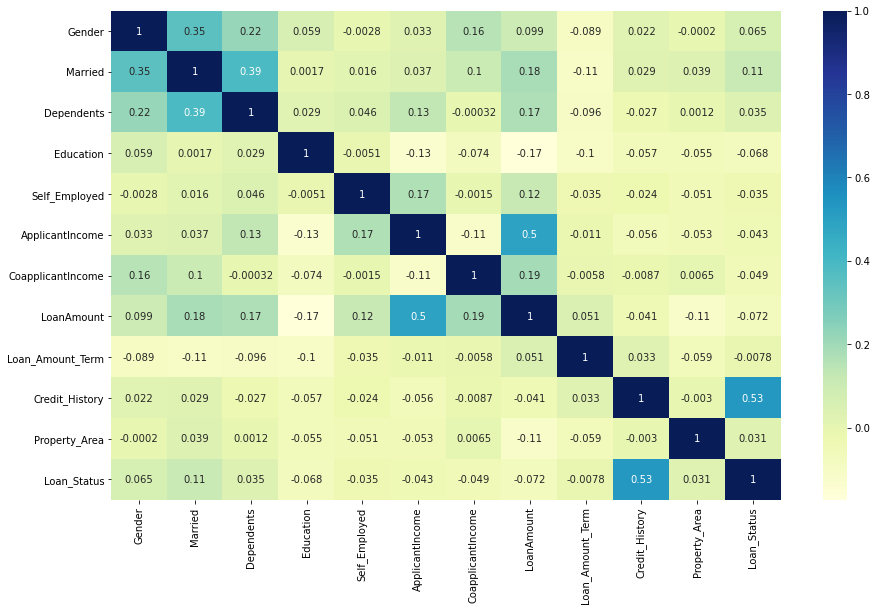

In [85]:
"""
Some interesting pattern here, the LoanAmount and CoApplicantIncome features are correlated to the ApplicantIncome (which is normal)
The creditHistory feature seam to explain a lot the result of the loan status
"""

plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:>

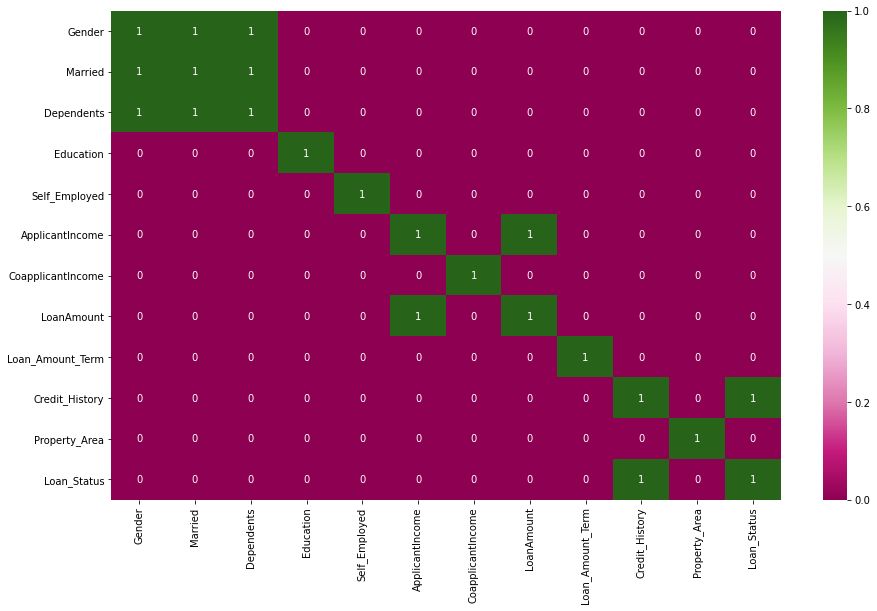

In [89]:
# lets focus on the features strongly correlated 
plt.figure(figsize=(15,9))
sns.heatmap(df.corr() >= 0.2, annot=True, cmap="PiYG")

'''
We can distinguish 3 clusters of strongly correlated features : 
- Gender, Married and Dependents 
- ApplicantIncome and LoanAmount
- Credit_History and Loan_Status
'''

### Data Split for ML algorithm

In [93]:
X = df.drop("Loan_Status", axis = 1)
y = df['Loan_Status']
print(X.shape, y.shape)

(480, 11) (480,)


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [97]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


### Pipelines for numerical and categorical features

In [104]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

print(num_pipeline)
print('*'*100)

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot',OneHotEncoder()),
    ('std_scaler',StandardScaler())

])
print(cat_pipeline)




Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one_hot', OneHotEncoder()),
                ('std_scaler', StandardScaler())])


In [125]:
>>> from sklearn.compose import ColumnTransformer

processing = ColumnTransformer([
    ('numeric', num_pipeline, numeric_columns),
    ('categorical', cat_pipeline, categorical_columns)
])

### Generic Methods to Model Prep

In [108]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [109]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [119]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [139]:
def prepare_confusion_matrix(nom, model):
    print(nom)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, ax = ax, annot=True)
    # labels, title and icks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    plt.show()
    


In [121]:
def prepare_classification_report(nom, model):
    print(nom+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [122]:
def prepare_roc_curve(nom, model):
    print(nom)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

### Classifiers Training

In [129]:
algorithms = [('logistic regression', LogisticRegression()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('XGBoost classifier', XGBClassifier())
             ]

trained_models = []

model_and_score = {}

for name,tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))
    
print(model_and_score)

'''
We can see that some algorithm perfrom better than others. We will see in detail with the roc curve and the confusion matrix
'''

{'logistic regression': '70.05208333333334%', 'KNN classifier': '78.90625%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '79.6875%', 'Gradientboot classifier': '90.625%', 'XGBoost classifier': '100.0%'}


### Confusion matrix

logistic regression


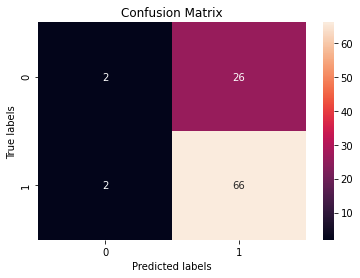

KNN classifier


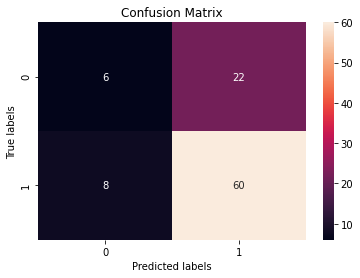

Random Forest calssifier


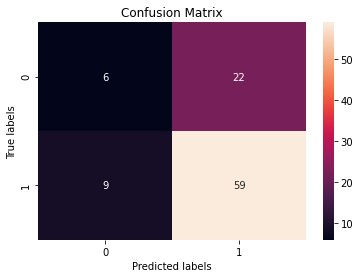

Adaboost classifier


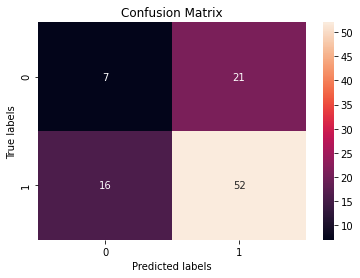

Gradientboot classifier


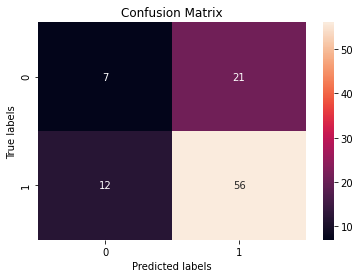

XGBoost classifier


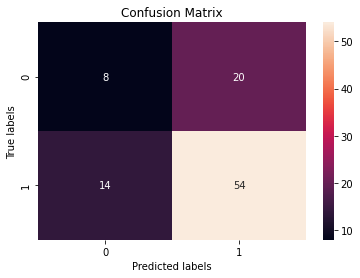

In [140]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0],tup[1])      

In [141]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0],tup[1])

logistic regression Report :
              precision    recall  f1-score   support

           0       0.50      0.07      0.12        28
           1       0.72      0.97      0.82        68

    accuracy                           0.71        96
   macro avg       0.61      0.52      0.47        96
weighted avg       0.65      0.71      0.62        96

KNN classifier Report :
              precision    recall  f1-score   support

           0       0.43      0.21      0.29        28
           1       0.73      0.88      0.80        68

    accuracy                           0.69        96
   macro avg       0.58      0.55      0.54        96
weighted avg       0.64      0.69      0.65        96

Random Forest calssifier Report :
              precision    recall  f1-score   support

           0       0.40      0.21      0.28        28
           1       0.73      0.87      0.79        68

    accuracy                           0.68        96
   macro avg       0.56      0.54      0.

logistic regression


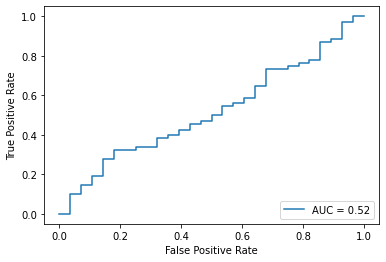

KNN classifier


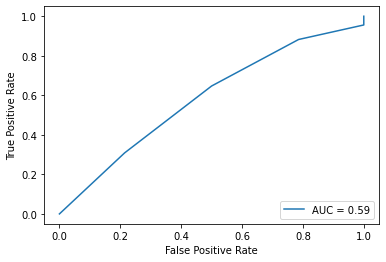

Random Forest calssifier


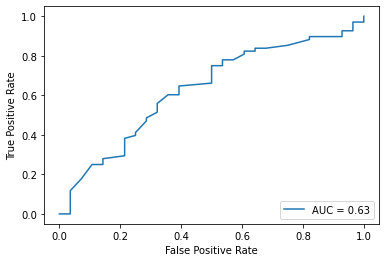

Adaboost classifier


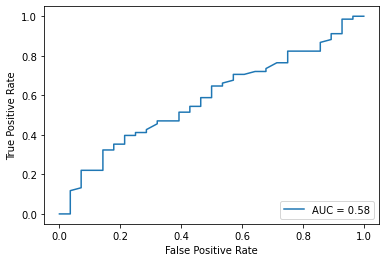

Gradientboot classifier


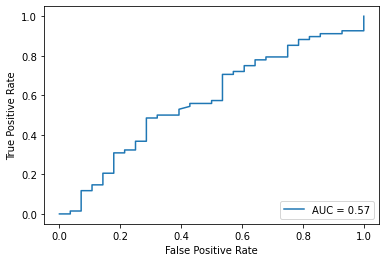

XGBoost classifier


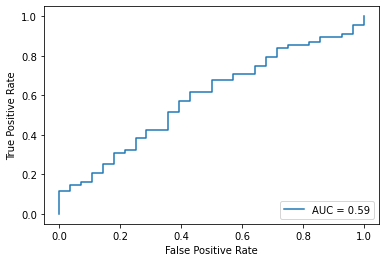

In [142]:
for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0],tup[1])

Based on our ROC Curves, we can see that our Random Forest, Gradient Boosting and XGboost model overfit the data which lead
to much less accuracy with the area under the curve. Nonetheless,the Random Forest model seems to provide the most precise prediction over all the other models with an accuracy of 0.63. We could try to improve this model by using GridSearch and finetuning the hyperparameter of our Random Forest model.